In [208]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
import matplotlib.cm as cm 
my_norm = Normalize(vmin=0, vmax=20)
my_cmap = cm.get_cmap('jet')


In [209]:
ut_marksheet = pd.read_csv('UT2.csv')


In [210]:
ut_marksheet = ut_marksheet.fillna(0)

In [211]:
ut_marksheet.head()

,Roll No,Name of Student,CNUT1,CNUT2,CNAvg,DWMUT1,DWMUT2,DWMAvg,TCSUT1,TCSUT2,TCSAvg,SEUT1,SEUT2,SEAvg
0,1,AGARWAL ARYAN,11,10,11,12,17,15,15,11,13,16.0,16,16.0
1,2,AGIVALE VINIT,14,14,14,15,18,17,12,11,12,15.0,18,17.0
2,3,ANAP JANHAVI,18,17,18,19,20,20,18,20,19,20.0,16,18.0
3,4,BHANUSHALI OMKAR,14,12,13,16,20,18,18,13,16,15.0,18,17.0
4,5,CHOUGULE OMKAR,15,17,16,19,20,20,16,19,18,19.0,20,20.0


In [212]:
ut_marksheet.columns

Index(['Roll No', 'Name of Student', 'CNUT1', 'CNUT2', 'CNAvg', 'DWMUT1',
       'DWMUT2', 'DWMAvg', 'TCSUT1', 'TCSUT2', 'TCSAvg', 'SEUT1', 'SEUT2',
       'SEAvg'],
      dtype='object')

In [213]:
plt.style.use('dark_background')

In [214]:
for x in ut_marksheet.columns:
    if x != 'Name of Student':
        ut_marksheet[x] = ut_marksheet[x].astype(int)
        # print(ut_marksheet[x].dtypes)




In [215]:
ut_marksheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Roll No          77 non-null     int64 
 1   Name of Student  77 non-null     object
 2   CNUT1            77 non-null     int64 
 3   CNUT2            77 non-null     int64 
 4   CNAvg            77 non-null     int64 
 5   DWMUT1           77 non-null     int64 
 6   DWMUT2           77 non-null     int64 
 7   DWMAvg           77 non-null     int64 
 8   TCSUT1           77 non-null     int64 
 9   TCSUT2           77 non-null     int64 
 10  TCSAvg           77 non-null     int64 
 11  SEUT1            77 non-null     int64 
 12  SEUT2            77 non-null     int64 
 13  SEAvg            77 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 8.5+ KB


In [216]:
data = ut_marksheet[ut_marksheet['Roll No'] == 24]


In [217]:
data

,Roll No,Name of Student,CNUT1,CNUT2,CNAvg,DWMUT1,DWMUT2,DWMAvg,TCSUT1,TCSUT2,TCSAvg,SEUT1,SEUT2,SEAvg
23,24,JAIN JAYESH,17,12,15,17,20,19,19,15,17,16,16,16


In [218]:
data.columns

Index(['Roll No', 'Name of Student', 'CNUT1', 'CNUT2', 'CNAvg', 'DWMUT1',
       'DWMUT2', 'DWMAvg', 'TCSUT1', 'TCSUT2', 'TCSAvg', 'SEUT1', 'SEUT2',
       'SEAvg'],
      dtype='object')

In [219]:
data[['CNUT1', 'CNUT2', 'CNAvg', 'DWMUT1',
      'DWMUT2', 'DWMAvg', 'TCSUT1', 'TCSUT2', 'TCSAvg', 'SEUT1', 'SEUT2',
      'SEAvg']]


,CNUT1,CNUT2,CNAvg,DWMUT1,DWMUT2,DWMAvg,TCSUT1,TCSUT2,TCSAvg,SEUT1,SEUT2,SEAvg
23,17,12,15,17,20,19,19,15,17,16,16,16


In [220]:
data.drop(['Roll No', 'Name of Student'], axis=1).values[0]


array([17, 12, 15, 17, 20, 19, 19, 15, 17, 16, 16, 16])

In [221]:
my_norm(data.drop(['Roll No', 'Name of Student'], axis=1).values[0])


masked_array(data=[0.85, 0.6 , 0.75, 0.85, 1.  , 0.95, 0.95, 0.75, 0.85,
                   0.8 , 0.8 , 0.8 ],
             mask=False,
       fill_value=1e+20)

In [234]:
def plot_marks(roll_no, df,show_avg = True,display_only_avg = False):
    data = df[df['Roll No'] == roll_no]
    if show_avg == True:
        drop_cols = ['Roll No', 'Name of Student']
    else:
        drop_cols = ['Roll No', 'Name of Student', 'CNAvg', 'DWMAvg', 'TCSAvg', 'SEAvg']
    
    if display_only_avg == True:
        show_cols = ['CNAvg', 'DWMAvg', 'TCSAvg', 'SEAvg']
        plt.title(f'Marks of {data["Name of Student"].values[0]}')
        plt.bar(show_cols, data[show_cols].values[0], color=my_cmap(
                my_norm(data.drop(drop_cols, axis=1).values[0])))
        # plt.legend(['CNAvg', 'DWMAvg', 'TCSAvg', 'SEAvg'])
        return
    
    plt.figure()
    plt.title(f'Marks of {data["Name of Student"].values[0]}')
    plt.xticks(rotation=90)
    plt.bar(data.drop(drop_cols, axis=1).columns,
            data.drop(drop_cols, axis=1).values[0], color=my_cmap(
                my_norm(data.drop(drop_cols, axis=1).values[0])))
    return plt.show()
    


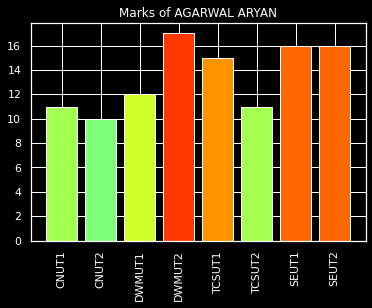

In [235]:
plot_marks(1,df=ut_marksheet,show_avg=False,display_only_avg=False)

In [228]:
ut_marksheet

,Roll No,Name of Student,CNUT1,CNUT2,CNAvg,DWMUT1,DWMUT2,DWMAvg,TCSUT1,TCSUT2,TCSAvg,SEUT1,SEUT2,SEAvg
0,1,AGARWAL ARYAN,11,10,11,12,17,15,15,11,13,16,16,16
1,2,AGIVALE VINIT,14,14,14,15,18,17,12,11,12,15,18,17
2,3,ANAP JANHAVI,18,17,18,19,20,20,18,20,19,20,16,18
3,4,BHANUSHALI OMKAR,14,12,13,16,20,18,18,13,16,15,18,17
4,5,CHOUGULE OMKAR,15,17,16,19,20,20,16,19,18,19,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,SINGH SIMRAN,12,13,13,16,20,18,15,11,13,20,16,18
73,74,TOTEY AARYA,12,9,11,18,19,19,14,13,14,15,19,17
74,75,UPADHYAY AMIT,9,9,9,14,9,12,11,8,10,10,12,11
75,76,YADAV ADITYA,18,15,17,18,20,19,15,14,15,20,19,20


In [253]:
def get_diction(values):
    diction = {}
    # count the number of occurances of each value
    for i in values:
        if i in diction:
            diction[i] += 1
        else:
            diction[i] = 1
    return diction


In [290]:
def plot_overall_sub(df, subject, UT_no='UT1'):
    plt.figure()
    column_name = subject + UT_no
    plt.title('overall students and the marks')
    data = sorted(df[column_name])
    diction = get_diction(data)
    plt.bar(x=diction.keys(),height = diction.values(),color = my_cmap(my_norm([int(x) for x in diction.keys()])))
    plt.xlabel(f'{subject} marks')
    plt.ylabel('Number of students')
    plt.legend()
    return plt.show()


No handles with labels found to put in legend.


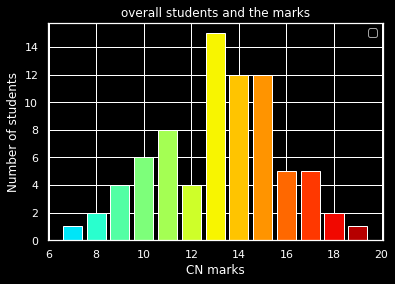

In [291]:
plot_overall_sub(ut_marksheet, 'CN',UT_no= 'Avg')

In [292]:
def get_hi_low(df, ut = "UT1"):
    sub = ['DWM','TCS','SE','CN']
    diction = {}
    for x in sub:
        column_name = x + ut
        data = df[column_name]
        diction[x] = (data.max(),data.min())
    return diction
    



In [300]:
def all_sub_hi_low_plot(df,ut = "UT1"):
    plt.figure()
    plt.title('All Subjects High and Low Marks')
    marks = get_hi_low(df,ut)
# plotting high and low values of all the subjects
    for x in marks.keys():
        plt.bar(x,marks[x],label=x,width = 0.5
        )
    plt.legend()
    return plt.show()

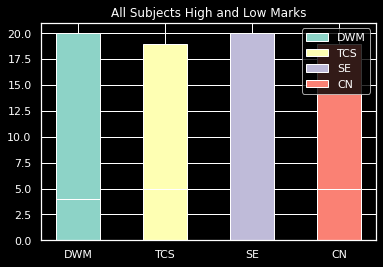

In [301]:
all_sub_hi_low_plot(ut_marksheet)